# DELIVERABLE 1: EXPLORATORY DATA ANALYSIS (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


In [3]:
flight_df = pd.read_csv('Flight Level Data.csv')
bags_df = pd.read_csv('Bag+Level+Data.csv')
pnr_flight_df = pd.read_csv('PNR+Flight+Level+Data.csv')
pnr_remarks_df = pd.read_csv('PNR Remark Level Data.csv')
airports_df = pd.read_csv('Airports Data.csv')
print("All CSV files loaded successfully!")

All CSV files loaded successfully!


# Preliminary Exploration of Raw Data

In [4]:
# Inspecting the raw Flight Level Data 
print("Exploring Raw Flight Level Data")
print(f"Shape: {flight_df.shape}")
print("\nInfo:")
flight_df.info()
flight_df.describe
print("\nMissing Values:")
print(flight_df.isnull().sum())
print("\nDescriptive Statistics:")
print(flight_df.describe())
print("\nFirst 3 Rows:")
print(flight_df.head(3))
print("\n" + "="*50 + "\n")


# Inspecting the raw Bag Level Data
print("Exploring Raw Bag Level Data")
print(f"Shape: {bags_df.shape}")
print("\nInfo:")
bags_df.info()
print("\nMissing Values:")
print(bags_df.isnull().sum())
print("\nFirst 3 Rows:")
print(bags_df.head(3))
print("\n" + "="*50 + "\n")


# Inspecting the raw PNR Flight Level Data
print("Exploring Raw PNR Flight Level Data")
print(f"Shape: {pnr_flight_df.shape}")
print("\nInfo:")
pnr_flight_df.info()
print("\nMissing Values:")
print(pnr_flight_df.isnull().sum())
print("\nDescriptive Statistics:")
print(pnr_flight_df.describe())
print("\nFirst 3 Rows:")
print(pnr_flight_df.head(3))
print("\n" + "="*50 + "\n")


# Inspecting the raw PNR Remark Level Data
print("Exploring Raw PNR Remark Level Data")
print(f"Shape: {pnr_remarks_df.shape}")
print("\nInfo:")
pnr_remarks_df.info()
print("\nMissing Values:")
print(pnr_remarks_df.isnull().sum())
print("\nFirst 3 Rows:")
print(pnr_remarks_df.head(3))
print("\n" + "="*50 + "\n")


# Inspecting the raw Airports Data
print("Exploring Raw Airports Data")
print(f"Shape: {airports_df.shape}")
print("\nInfo:")
airports_df.info()
print("\nMissing Values:")
print(airports_df.isnull().sum())
print("\nFirst 3 Rows:")
print(airports_df.head(3))
print("\n" + "="*50 + "\n")

Exploring Raw Flight Level Data
Shape: (8099, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   company_id                          8099 non-null   object
 1   flight_number                       8099 non-null   int64 
 2   scheduled_departure_date_local      8099 non-null   object
 3   scheduled_departure_station_code    8099 non-null   object
 4   scheduled_arrival_station_code      8099 non-null   object
 5   scheduled_departure_datetime_local  8099 non-null   object
 6   scheduled_arrival_datetime_local    8099 non-null   object
 7   actual_departure_datetime_local     8099 non-null   object
 8   actual_arrival_datetime_local       8099 non-null   object
 9   total_seats                         8099 non-null   int64 
 10  fleet_type                          8099 non-null   object
 11 

# Data Cleaning and Preprocessing

In [5]:
# Flight DF
flight_df.columns = flight_df.columns.str.lower().str.strip()
for col in ['scheduled_departure_datetime_local', 'scheduled_arrival_datetime_local', 'actual_departure_datetime_local', 'actual_arrival_datetime_local', 'scheduled_departure_date_local']:
    flight_df[col] = pd.to_datetime(flight_df[col], errors='coerce')

# PNR Flight DF 
pnr_flight_df.columns = pnr_flight_df.columns.str.lower().str.strip()
pnr_flight_df['scheduled_departure_date_local'] = pd.to_datetime(pnr_flight_df['scheduled_departure_date_local'], errors='coerce')

# Bags DF 
bags_df.columns = bags_df.columns.str.lower().str.strip()
bags_df['scheduled_departure_date_local'] = pd.to_datetime(bags_df['scheduled_departure_date_local'], errors='coerce')

# Drop duplicates based on a unique flight identifier
flight_df.drop_duplicates(subset=['company_id', 'flight_number', 'scheduled_departure_date_local'], inplace=True)

# Drop rows where essential datetime information is missing (likely cancelled flights)
flight_df.dropna(subset=['actual_departure_datetime_local', 'actual_arrival_datetime_local'], inplace=True)

# --- 3. Create Core Metrics ---
# Calculate Departure Delay in Minutes, which will be used in multiple questions
flight_df['delay_minutes'] = (flight_df['actual_departure_datetime_local'] - flight_df['scheduled_departure_datetime_local']).dt.total_seconds() / 60

print("Data cleaning and type conversion for all relevant dataframes is complete.")
print(f"Remaining flights for analysis after cleaning: {flight_df.shape[0]}")

Data cleaning and type conversion for all relevant dataframes is complete.
Remaining flights for analysis after cleaning: 8063


# Q1. What is the average delay and what percentage of flights depart later than scheduled?

EDA Question 1: Analysis of Departure Delays
Average Departure Delay (for late flights): 47.07 minutes
Percentage of Flights Departing Late: 49.68%


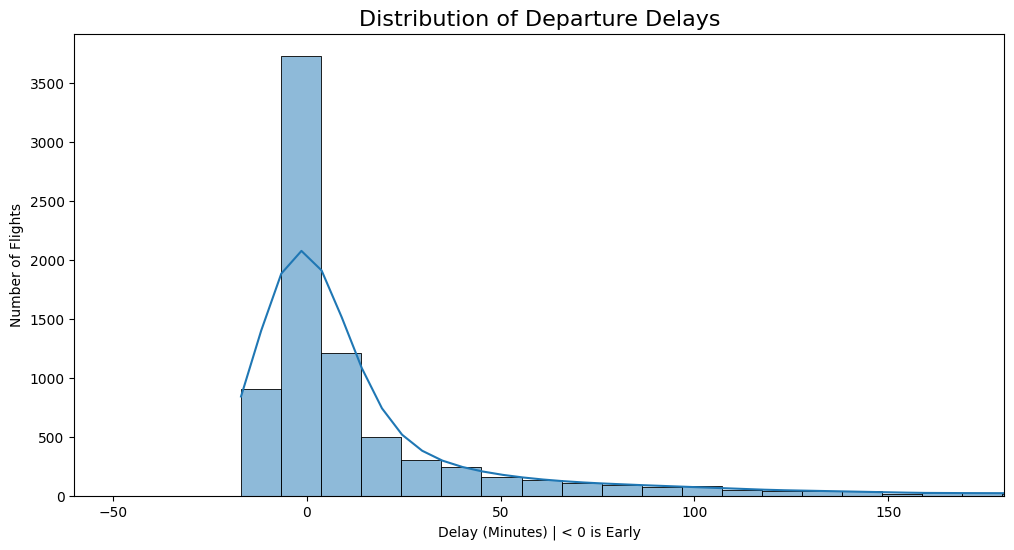

In [6]:
print("EDA Question 1: Analysis of Departure Delays")

delayed_flights_df = flight_df[flight_df['delay_minutes'] > 0]
avg_delay = delayed_flights_df['delay_minutes'].mean()
percentage_delayed = (len(delayed_flights_df) / len(flight_df)) * 100

print(f"Average Departure Delay (for late flights): {avg_delay:.2f} minutes")
print(f"Percentage of Flights Departing Late: {percentage_delayed:.2f}%")

# Visualize the distribution of delays
plt.figure(figsize=(12, 6))
sns.histplot(flight_df['delay_minutes'], bins=100, kde=True)
plt.title('Distribution of Departure Delays', fontsize=16)
plt.xlabel('Delay (Minutes) | < 0 is Early')
plt.ylabel('Number of Flights')
plt.xlim(-60, 180)  # Zoom in on the most common range for clarity
plt.savefig('1_delay_distribution.png')
plt.show()

# Q2. How many flights have scheduled ground time close to or below the minimum turn mins?

Original number of flights: 8063
Number of flights after filtering outliers: 7903


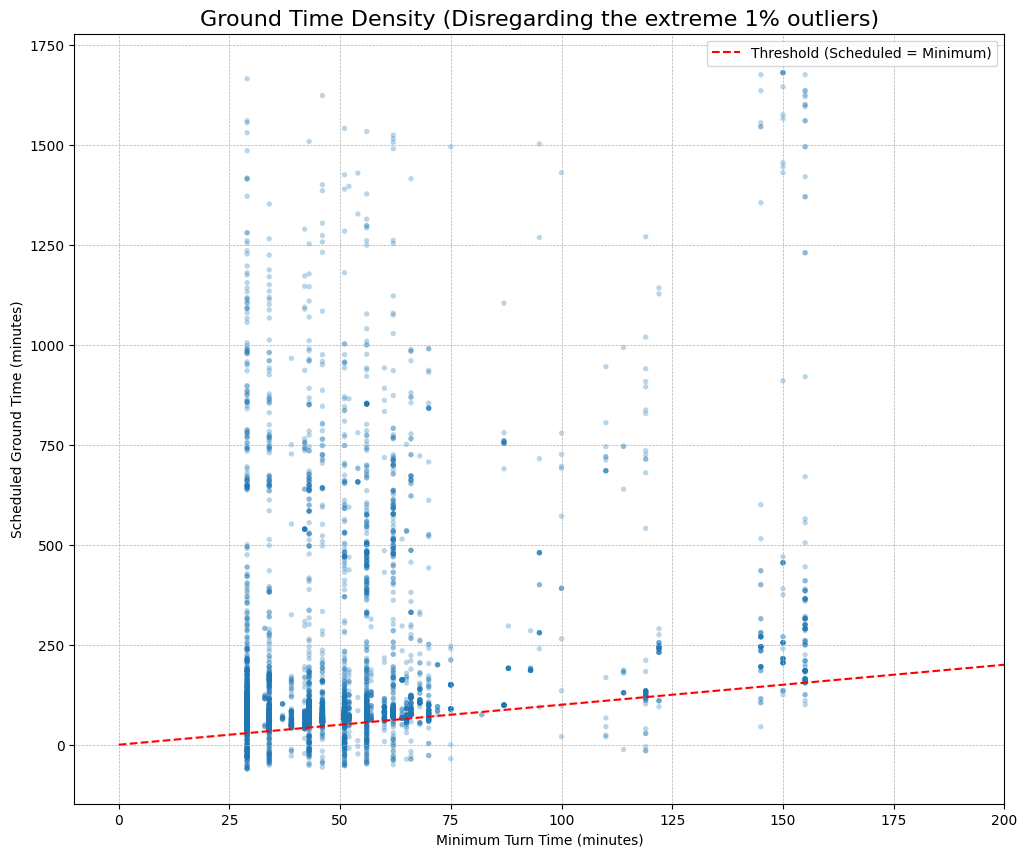

In [7]:
lower_quantile = 0.01
upper_quantile = 0.99

min_turn_limits = flight_df['minimum_turn_minutes'].quantile([lower_quantile, upper_quantile])
sched_ground_limits = flight_df['scheduled_ground_time_minutes'].quantile([lower_quantile, upper_quantile])

filtered_df = flight_df[
    (flight_df['scheduled_ground_time_minutes'] >= sched_ground_limits.loc[lower_quantile]) &
    (flight_df['scheduled_ground_time_minutes'] <= sched_ground_limits.loc[upper_quantile])
]

print(f"Original number of flights: {len(flight_df)}")
print(f"Number of flights after filtering outliers: {len(filtered_df)}")

plt.figure(figsize=(12, 10))
plt.xlim(-10, 200)
sns.scatterplot(data=filtered_df, x='minimum_turn_minutes', y='scheduled_ground_time_minutes',
                alpha=0.3, s=15, edgecolor='none')

plt.title('Ground Time Density (Disregarding the extreme 1% outliers)', fontsize=16)
plt.xlabel('Minimum Turn Time (minutes)')
plt.ylabel('Scheduled Ground Time (minutes)')

max_val = max(filtered_df['minimum_turn_minutes'].max(), filtered_df['scheduled_ground_time_minutes'].max())
plt.plot([0, max_val + 10], [0, max_val + 10], color='red', linestyle='--', label='Threshold (Scheduled = Minimum)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('5_ground_time_filtered_scatter.png')
plt.show()

# Q3. What is the average ratio of transfer bags vs. checked bags across flights?


EDA Question 3: Analysis of Baggage Composition
The average ratio of transfer bags to total bags on a flight is: 66.83%


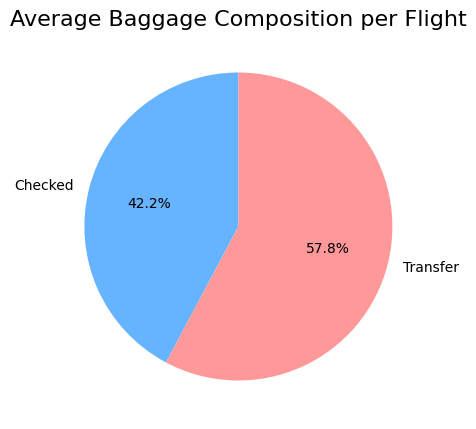

In [8]:
print("\nEDA Question 3: Analysis of Baggage Composition")

bags_df['bag_category'] = np.where(bags_df['bag_type'] == 'Origin', 'Checked', 'Transfer')

# Aggregate bag counts per flight
bag_counts = bags_df.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local'])['bag_category'].value_counts().unstack(fill_value=0)

# Ensuring both columns exist before adding
if 'Checked' not in bag_counts.columns: bag_counts['Checked'] = 0
if 'Transfer' not in bag_counts.columns: bag_counts['Transfer'] = 0

bag_counts['total_bags'] = bag_counts['Checked'] + bag_counts['Transfer']
bag_counts = bag_counts[bag_counts['total_bags'] > 0]

# Calculate the ratio of transfer bags to total bags
bag_counts['transfer_ratio'] = bag_counts['Transfer'] / bag_counts['total_bags']
avg_transfer_ratio = bag_counts['transfer_ratio'].mean()

print(f"The average ratio of transfer bags to total bags on a flight is: {avg_transfer_ratio:.2%}")

# Visualize average composition
avg_composition = bag_counts[['Checked', 'Transfer']].mean()
plt.figure(figsize=(8, 5))
avg_composition.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Average Baggage Composition per Flight', fontsize=16)
plt.ylabel('') # Hide the 'None' label
plt.savefig('3_baggage_composition.png')
plt.show()

# Q4. How do passenger loads compare across flights, and do higher loads correlate with operational difficulty?


EDA Question 4: Analysis of Passenger Load Factor
Missing values after cleaning:
total_pax      0
load_factor    0
dtype: int64
Correlation between Load Factor and Departure Delay: -0.174


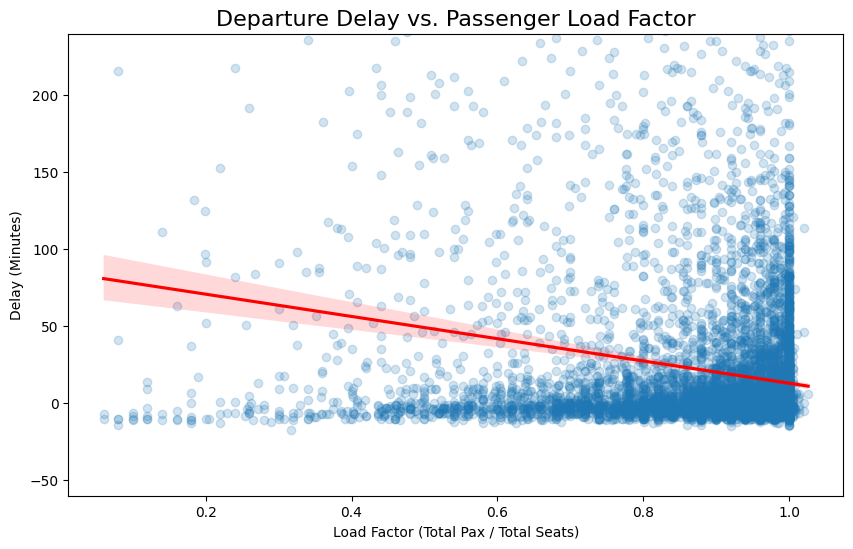

In [9]:
print("\nEDA Question 4: Analysis of Passenger Load Factor")

# Aggregate PNR data to get total passengers per flight.
pax_per_pnr = pnr_flight_df.drop_duplicates(subset=['record_locator', 'flight_number', 'scheduled_departure_date_local'])
pax_counts = pax_per_pnr.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local']).agg(total_pax=('total_pax', 'sum')).reset_index()

# Merge passenger counts with flight data
flight_pax_df = pd.merge(flight_df, pax_counts, on=['company_id', 'flight_number', 'scheduled_departure_date_local'], how='left')

flight_pax_df['total_pax'] = flight_pax_df['total_pax'].fillna(0)

# Calculate Load Factor
flight_pax_df['load_factor'] = flight_pax_df['total_pax'] / flight_pax_df['total_seats']
flight_pax_df['load_factor'] = flight_pax_df['load_factor'].replace([np.inf, -np.inf], np.nan).fillna(0) # clean potential division by zero

# Diagnostic check to confirm no NaNs are left
print("Missing values after cleaning:")
print(flight_pax_df[['total_pax', 'load_factor']].isnull().sum())

# Calculate and print correlation
correlation = flight_pax_df['load_factor'].corr(flight_pax_df['delay_minutes'])
print(f"Correlation between Load Factor and Departure Delay: {correlation:.3f}")

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.regplot(data=flight_pax_df, x='load_factor', y='delay_minutes',
            scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Departure Delay vs. Passenger Load Factor', fontsize=16)
plt.xlabel('Load Factor (Total Pax / Total Seats)')
plt.ylabel('Delay (Minutes)')
plt.ylim(-60, 240) 
plt.savefig('4_load_factor_vs_delay.png')
plt.show()

# Q5. Are high special service requests flights also high-delay after controlling for load?


EDA Question 5: Analysis of Special Service Requests


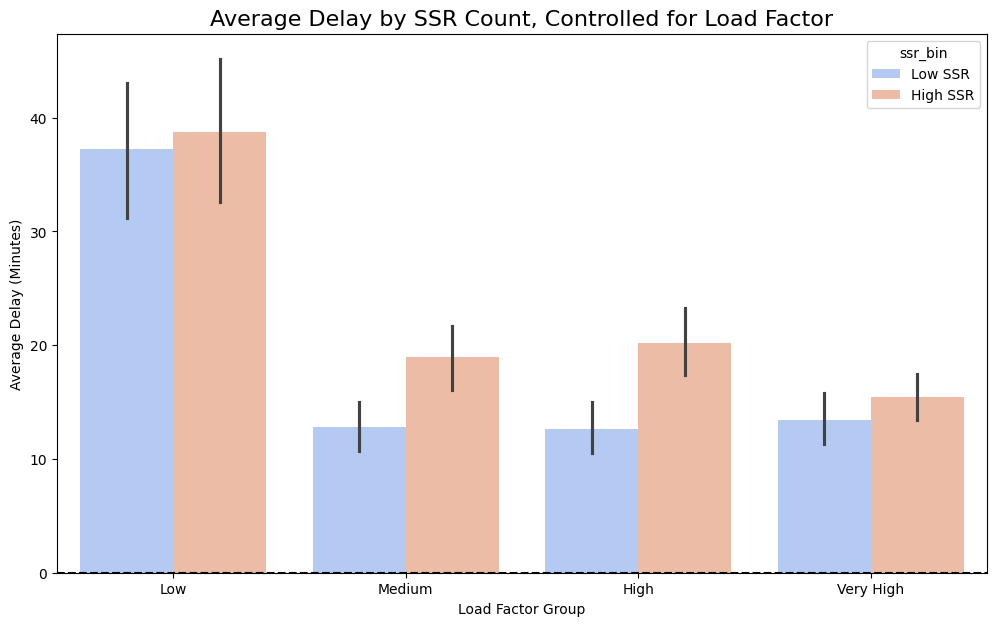


The bar chart shows that across all load factor groups, flights with a 'High' number of SSRs consistently have a higher average departure delay.


In [10]:
print("\nEDA Question 5: Analysis of Special Service Requests")

# Associate remarks to a flight via the record_locator from the PNR Flight data.
pnr_with_date = pnr_flight_df[['record_locator', 'company_id', 'flight_number', 'scheduled_departure_date_local']].drop_duplicates()

remarks_to_merge = pnr_remarks_df.drop(columns=['flight_number', 'pnr_creation_date'])
remarks_with_date = pd.merge(remarks_to_merge, pnr_with_date, on='record_locator', how='left')

ssr_counts = remarks_with_date.groupby(['company_id', 'flight_number', 'scheduled_departure_date_local']).size().reset_index(name='ssr_count')

# Merge SSR counts into our main dataframe
final_df = pd.merge(flight_pax_df, ssr_counts, on=['company_id', 'flight_number', 'scheduled_departure_date_local'], how='left')

final_df['ssr_count'] = final_df['ssr_count'].fillna(0)

# To 'control for load', we'll bin flights by load factor and compare delays
# We need to handle cases where load_factor might be all zeros, which qcut dislikes.
if final_df['load_factor'].nunique() > 1:
    final_df['load_factor_bin'] = pd.qcut(final_df['load_factor'], q=4, labels=['Low', 'Medium', 'High', 'Very High'], duplicates='drop')
else:
    final_df['load_factor_bin'] = 'Single Bin'

if final_df['ssr_count'].nunique() > 1:
    final_df['ssr_bin'] = pd.qcut(final_df['ssr_count'].rank(method='first'), q=2, labels=['Low SSR', 'High SSR'], duplicates='drop')
else:
    final_df['ssr_bin'] = 'Single Bin'


plt.figure(figsize=(12, 7))
sns.barplot(data=final_df, x='load_factor_bin', y='delay_minutes', hue='ssr_bin', palette='coolwarm')
plt.title('Average Delay by SSR Count, Controlled for Load Factor', fontsize=16)
plt.xlabel('Load Factor Group')
plt.ylabel('Average Delay (Minutes)')
plt.axhline(0, color='black', linestyle='--')
plt.savefig('5_ssr_vs_delay_controlled.png')
plt.show()

print("\nThe bar chart shows that across all load factor groups, flights with a 'High' number of SSRs consistently have a higher average departure delay.")